In [ ]:
!pip3 install sklearn

In [ ]:
import numpy as np
import pandas as pd

input_file = "data/WineNewGBTDataSet.csv"
col_Names=["fixedAcidity",
    "volatileAcidity",
    "citricAcid",
    "residualSugar",
    "chlorides",
    "freeSulfurDioxide",
    "totalSulfurDioxide",
    "density",
    "pH",
    "sulphates",
    "Alcohol",
    "Quality"]

wine_df = pd.read_csv(input_file,sep=";",header=None, names=col_Names)
wine_df.head()

In [ ]:
#check labels
print(wine_df.Quality.unique())

In [ ]:
#clean up and encode labels
wine_df.Quality.replace('1',"Excellent",inplace=True)
wine_df.describe()

In [ ]:
#encode labels 
wine_df.Quality = pd.Categorical(wine_df.Quality)
wine_df['Label'] = wine_df.Quality.cat.codes
wine_df.head()

In [ ]:
#random forest Classifier Grid Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_df.iloc[:,:11],
                                                    wine_df['Label'],
                                                    test_size=0.3, 
                                                    random_state=30)

#parameters for grid search
rfc = RandomForestClassifier(random_state=10)

GS_params = { 
    'n_estimators': [50,70,90],
    'max_depth' : [5,7,9]
}

#Cross Validation Grid Search
CV_rfc = GridSearchCV(estimator=rfc, 
                      param_grid=GS_params, 
                      cv= 3,
                      n_jobs=-1,
                      verbose=1)
CV_rfc.fit(X_train, y_train)

In [ ]:
#final Model
rfc_final = CV_rfc.best_estimator_
#Show Best Parameters 
print(CV_rfc.best_params_)

#Predict on test dataset
y_true, y_pred = y_test, rfc_final.predict(X_test)
y_pred_proba = rfc_final.predict_proba(X_test)[:,1]

In [ ]:
#Evaluation metrics matrix
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

In [ ]:
# Calcultate points for ROC Curve
from sklearn.metrics import roc_curve,roc_auc_score
# get Area Under ROC curve
auc = roc_auc_score(y_true, y_pred)
# get False Positive Rate and True Positive Rate  
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)

<IPython.core.display.Javascript object>


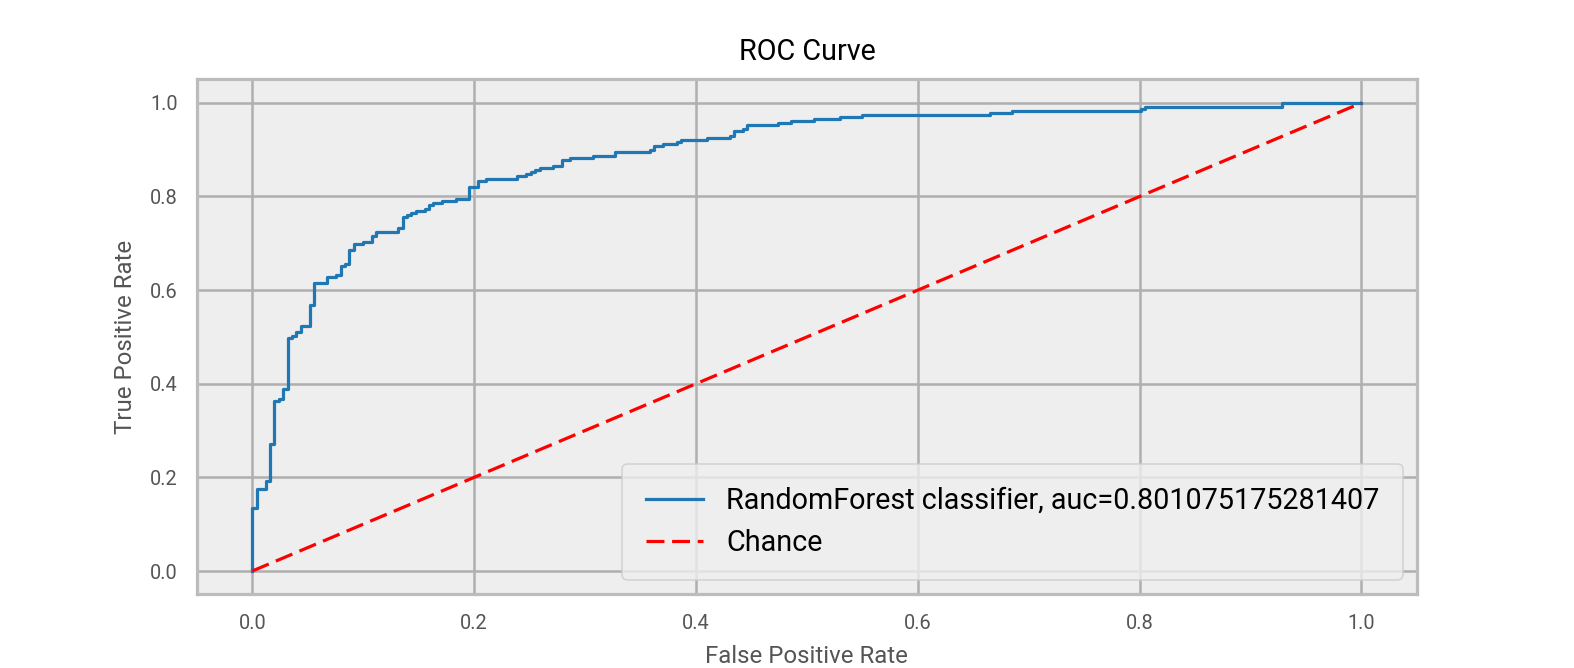

In [14]:
#Plot ROC Curve
%matplotlib notebook
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,label="RandomForest classifier, auc="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--',color='r',label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

In [ ]:
#Save Model
from joblib import dump
dump(rfc_final, 'sklearn_model.joblib') 